In [1]:
# Bash scripts are run via SLURM.
# see commands/03_ani.sh

In [4]:

import gempipe

# ANI-based filtering

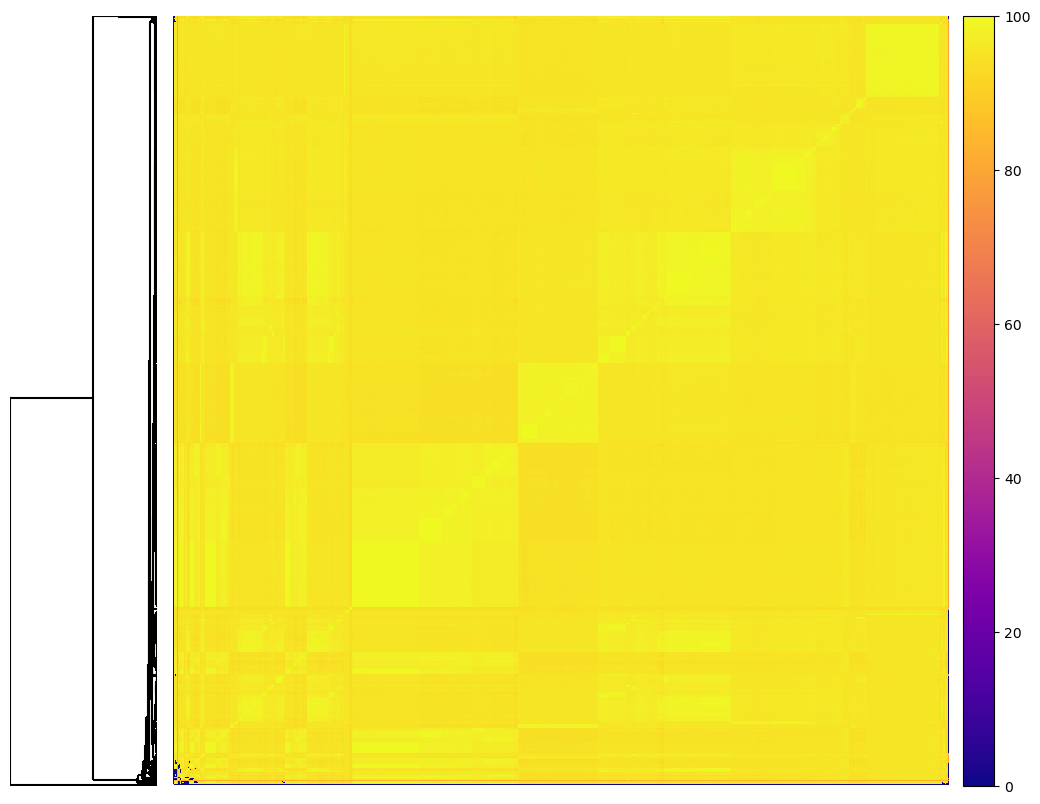

In [22]:
# before
fig, triangular = gempipe.animatrix(
    tree_original='fastani/ANIclustermap_dendrogram.nwk', 
    triangular='fastani/ANIclustermap_matrix.tsv',
    verbose=True, replace0=0, cellannot=False, fastmode=True,
)

76 genomes had ANI < 95 respect to GCA_000016825.1, thus were removed.


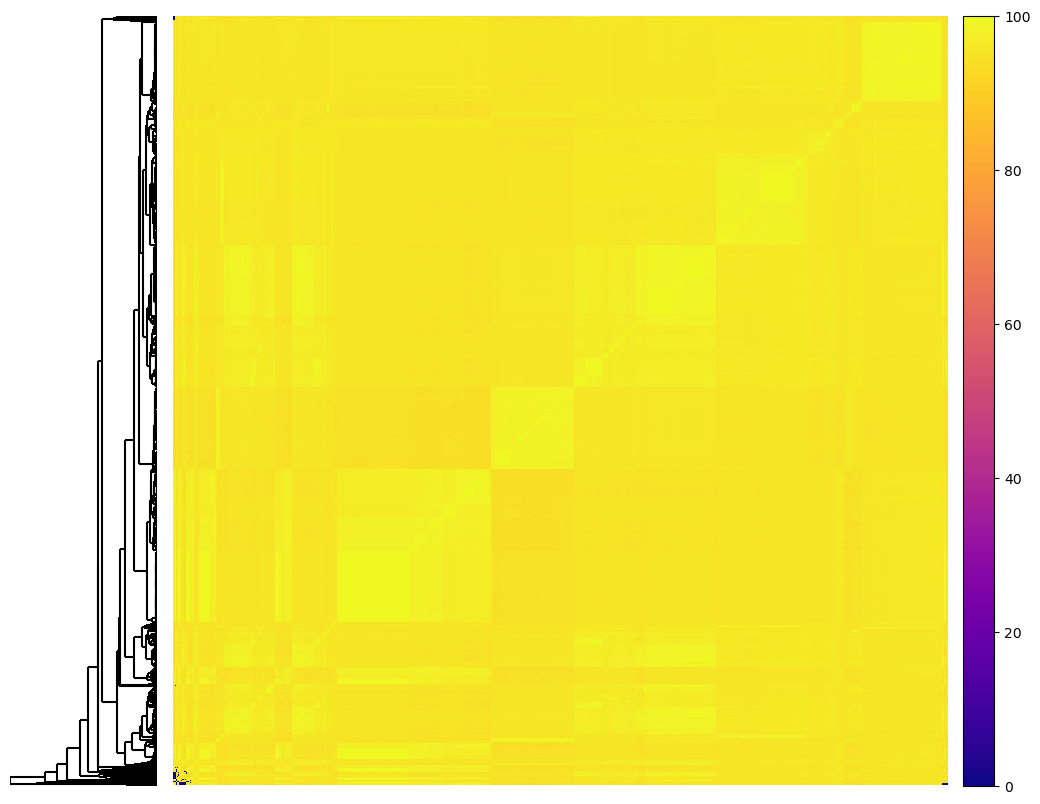

In [23]:
# after
fig, triangular = gempipe.animatrix(
    tree_original='fastani/ANIclustermap_dendrogram.nwk', 
    triangular='fastani/ANIclustermap_matrix.tsv',
    verbose=True, replace0=0, cellannot=False, fastmode=True, 
    type_strain='GCA_000016825.1',
)

In [27]:
# copy taxonomy-filtered genomes:

import os
import shutil 
import glob
from pathlib import Path

os.makedirs('genomes_tf/', exist_ok=True)
all_genome_files = glob.glob('genomes_all/genbank/bacteria/*/*.fna')
for acc in triangular.index: 
    for filepath in all_genome_files:
        file = Path(filepath).stem
        if file.startswith(acc):
            shutil.copyfile(filepath, f'genomes_tf/{acc}.fna')